In [2]:
#import pandas and numpy for data load and preprocessing
import pandas as pd
import numpy as np

data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#finding total columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
#spliting to only numeric columns
data_num = data.select_dtypes(include=[np.number])

In [5]:
#spliting to only categorical columns
data_cat = data.select_dtypes(exclude =[np.number])

In [13]:
#converting target value into numeric throgh lambda funcation(python)
Num_val = {'Yes':1, 'No':0}
data_cat['Attrition'] = data_cat["Attrition"].apply(lambda x: Num_val[x])
data_cat.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [6]:
#removing target(Attrition) column from dataframe
target = data_cat['Attrition']
data_cat.drop(columns=['Attrition'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [7]:
#using get_dummies to Convert categorical variable into dummy/indicator variables 
data_cat = pd.get_dummies(data_cat)
data_cat

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,1,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,1,0,1
1,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
2,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1466,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1467,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
1468,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,1,0


In [8]:
#adding all columns(cat+num)
data_final = pd.concat([data_num, data_cat], axis=1)
data_final.head

<bound method NDFrame.head of       Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   

In [9]:
#importing standard lib 
from sklearn import preprocessing
from scipy import stats
from scipy.stats import zscore
data_final.apply(lambda x: x if np.std(x) == 0 else zscore(x))

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,1,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,1,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,1,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,1,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,1,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1,0.628241,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,1,1.721670,0.254625,-1.224807,1.785511,-0.057788,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1,0.628241,-0.628241
1466,0.227347,-0.469754,-0.393938,-1.868426,1,1.723332,1.169781,-1.175601,-1.026167,0.845911,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1,0.628241,-0.628241
1467,-1.086676,-1.605183,-0.640727,0.085049,1,1.726655,-0.660531,1.038693,1.785511,-0.057788,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1,-1.591746,1.591746
1468,1.322365,0.546677,-0.887515,0.085049,1,1.728317,1.169781,-0.142264,-1.026167,-0.057788,...,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565,1,0.628241,-0.628241


In [10]:
#importing PCA for dimensionality-reduction
#importing MinMaxScaler to Transform features by scaling each feature to a given range.
#importing matplotlib for ploting chart(to find exact dimention in PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [11]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data_final[1:])

In [12]:
data_rescaled

array([[0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        1.        ],
       [0.35714286, 0.9234073 , 0.07142857, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

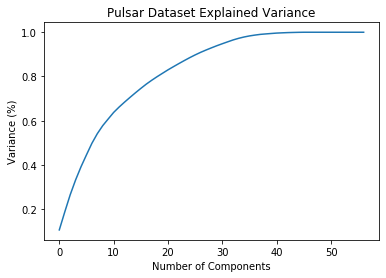

In [13]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [14]:
#graph shows the value of n_components(i.e., at 35 the curve gets smooth)
pca = PCA(n_components=35)
dataset = pca.fit_transform(data_rescaled)

In [15]:
#train_test_split: Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

In [16]:
#spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(dataset, target[1:], test_size=0.3, random_state=10)

In [17]:
#creating model by RandomForestClassifier on training data
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
#calculating accuracy (accuracy_score:Accuracy classification score.)
from sklearn.metrics import accuracy_score
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.9795918367346939